>### Data Loading and Initial Exploration
>#### Inspected the dataset using .head(), .tail(), .info(), and .describe() to understand its structure.
>#### Reviewed key distributions, including country-wise breakdowns using .value_counts() for the Country column.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from IPython.display import display

companies = pd.read_csv("Top 2000 Companies Financial Data 2024.csv")

display(companies.head())
display(companies.tail())
print(companies.info())
print(companies.Country.value_counts())

,Unnamed: 0,Name,Country,Sales,Profit,Assets,Market Value
0,0,JPMorganChase,United States,$252.9 B,$50 B,"$4,090.7 B",$588.1 B
1,1,Berkshire Hathaway,United States,$369 B,$73.4 B,"$1,070 B",$899.1 B
2,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$489.1 B,$116.9 B,$661.5 B,"$1,919.3 B"
3,3,ICBC,China,$223.8 B,$50.4 B,"$6,586 B",$215.2 B
4,4,Bank of America,United States,$183.3 B,$25 B,"$3,273.8 B",$307.3 B


,Unnamed: 0,Name,Country,Sales,Profit,Assets,Market Value
1996,1996,Sichuan Chuantou Energy,China,$201 M,$632.7 M,$8.6 B,$11.3 B
1997,1997,Vietnam Prosperity Joint-sock Commercial Bank,Vietnam,$3.9 B,$460.2 M,$33.2 B,$6 B
1998,1998,Adient,United States,$15.2 B,$158 M,$9.3 B,$2.6 B
1999,1999,CapitaLand Investment,Singapore,$2.2 B,$134.8 M,$25.9 B,$10 B
2000,2000,Shanxi Lu'an Environmental,China,$5.1 B,$812.8 M,$11.6 B,$9 B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2001 non-null   int64 
 1   Name          2001 non-null   object
 2   Country       2001 non-null   object
 3   Sales         2001 non-null   object
 4   Profit        2001 non-null   object
 5   Assets        2001 non-null   object
 6   Market Value  2001 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.6+ KB
None
Country
United States           621
China                   280
Japan                   181
India                    71
United Kingdom           66
South Korea              61
Canada                   59
Germany                  50
France                   49
Switzerland              46
Hong Kong                44
Taiwan                   41
Australia                31
Italy                    28
Brazil                   26
Sweden                   25
Ire

>### Data cleaning AND Preprocessing
>#### Identified issues with financial data represented in strings (e.g., "B" for billions, "M" for millions).
>#### Wrote a cleaning function leveraging regular expressions and a dictionary of units to standardize numerical values in columns Sales, Profit, Assets, and Market Value.
>#### Dropped unnecessary columns (e.g., Unnamed: 0) and converted the Country column to categorical data for efficiency.

In [2]:
columns = ["Sales", "Profit", "Assets","Market Value"]

for item in columns:     
    currency = companies[item].str[0]
    volume = companies[item].str[-1]
    currency = currency.unique()
    volume = volume.unique()
    print(item,"\n",currency,"-->",volume)


Sales 
 ['$'] --> ['B' 'M']
Profit 
 ['$'] --> ['B' 'M']
Assets 
 ['$'] --> ['B']
Market Value 
 ['$'] --> ['B' 'M']


In [3]:
import re
volumes={
    "B" : 1000000000,
    "M" : 1000000
}
def clean(data):
    value = re.search("\d+(?:\.\d+)?",data)
    volume = data[-1]
    return float(value.group(0)) * volumes[volume]



<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nmn\AppData\Local\Temp\ipykernel_29520\3373099575.py:7: SyntaxWarning: invalid escape sequence '\d'
  value = re.search("\d+(?:\.\d+)?",data)


In [4]:
companies["Sales"] = companies["Sales"].apply(clean)
companies["Profit"] = companies["Profit"].apply(clean)
companies["Assets"] = companies["Assets"].apply(clean)
companies["Market Value"] = companies["Market Value"].apply(clean)

companies.drop(["Unnamed: 0"], axis=1, inplace=True)
companies.Country = companies.Country.astype("category")

print(companies.info())
print(companies.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          2001 non-null   object  
 1   Country       2001 non-null   category
 2   Sales         2001 non-null   float64 
 3   Profit        2001 non-null   float64 
 4   Assets        2001 non-null   float64 
 5   Market Value  2001 non-null   float64 
dtypes: category(1), float64(4), object(1)
memory usage: 82.8+ KB
None
              Sales        Profit        Assets  Market Value
count  2.001000e+03  2.001000e+03  2.001000e+03  2.001000e+03
mean   2.583867e+10  2.444232e+09  7.184403e+10  3.643330e+10
std    4.658344e+10  6.106859e+09  1.190175e+11  6.603290e+10
min    1.230000e+08  1.000000e+05  1.000000e+09  7.000000e+06
25%    6.000000e+09  5.536000e+08  1.470000e+10  7.800000e+09
50%    1.270000e+10  1.000000e+09  3.090000e+10  1.720000e+10
75%    2.540000e+10  2.200000e+09  7.

>### feature Engineering
>#### Added derived columns to enhance analysis, including:
>#### Profit Margin (%): Calculated as (Profit / Sales) * 100.
>#### Asset Turnover Ratio: Defined as Sales / Assets.
>#### Return on Assets (ROA) (%): Calculated as (Profit / Assets) * 100.
>#### Company Size: Binned Assets into categories: Small, Medium, and Large.
>#### Costs: Derived as Sales - Profit. 

In [5]:
companies["Profit_margin"] = (companies["Profit"] / companies["Sales"]) * 100
companies["Asset_turnover_ratio"] = (companies["Sales"] / companies["Assets"])
companies["ROA"] = (companies["Profit"] / companies["Assets"]) * 100

companies["company_size"] = pd.cut(companies.Assets, 
                                   bins=[0,1.47e+10,7.11e+10,companies.Assets.max()],
                                   labels=["Small","Medium","Large"])

companies['Costs'] = companies['Sales'] - companies['Profit']

display(companies.head())
display(companies.describe())

,Name,Country,Sales,Profit,Assets,Market Value,Profit_margin,Asset_turnover_ratio,ROA,company_size,Costs
0,JPMorganChase,United States,2.529000e+11,5.000000e+10,4.000000e+09,5.881000e+11,19.770660,63.22500,1250.000000,Small,2.029000e+11
1,Berkshire Hathaway,United States,3.690000e+11,7.340000e+10,1.000000e+09,8.991000e+11,19.891599,369.00000,7340.000000,Small,2.956000e+11
2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,4.891000e+11,1.169000e+11,6.615000e+11,1.000000e+09,23.901043,0.73938,17.671958,Large,3.722000e+11
3,ICBC,China,2.238000e+11,5.040000e+10,6.000000e+09,2.152000e+11,22.520107,37.30000,840.000000,Small,1.734000e+11
4,Bank of America,United States,1.833000e+11,2.500000e+10,3.000000e+09,3.073000e+11,13.638843,61.10000,833.333333,Small,1.583000e+11


,Sales,Profit,Assets,Market Value,Profit_margin,Asset_turnover_ratio,ROA,Costs
count,2.001000e+03,2.001000e+03,2.001000e+03,2.001000e+03,2001.000000,2001.000000,2001.000000,2.001000e+03
mean,2.583867e+10,2.444232e+09,7.184403e+10,3.643330e+10,16.371167,2.144060,25.958978,2.339444e+10
std,4.658344e+10,6.106859e+09,1.190175e+11,6.603290e+10,85.624474,13.236273,214.115227,4.274111e+10
min,1.230000e+08,1.000000e+05,1.000000e+09,7.000000e+06,0.000546,0.002063,0.000571,-7.800000e+09
25%,6.000000e+09,5.536000e+08,1.470000e+10,7.800000e+09,4.758999,0.167916,1.260606,4.837400e+09
50%,1.270000e+10,1.000000e+09,3.090000e+10,1.720000e+10,10.416667,0.486679,3.685769,1.140000e+10
75%,2.540000e+10,2.200000e+09,7.110000e+10,3.720000e+10,18.251852,0.858108,7.727273,2.314790e+10
max,6.573000e+11,1.169000e+11,9.916000e+11,8.991000e+11,3658.536585,369.000000,7340.000000,6.384000e+11


>### Outlier Detection and Handling
>#### Identified and addressed anomalies where calculated Costs were zero or negative, potentially indicating errors in the dataset.
>#### Removed rows with such inconsistencies to improve data quality.

In [6]:
display(companies[companies["Costs"]<=0])

companies = companies[~(companies["Costs"]<=0)]

display(companies.describe())

,Name,Country,Sales,Profit,Assets,Market Value,Profit_margin,Asset_turnover_ratio,ROA,company_size,Costs
402,Investor AB,Sweden,7.400000e+09,1.520000e+10,8.480000e+10,7.910000e+10,205.405405,0.087264,17.924528,Large,-7.800000e+09
756,3i Group,United Kingdom,7.070000e+08,4.800000e+09,2.730000e+10,3.620000e+10,678.925035,0.025897,17.582418,Medium,-4.093000e+09
955,Itaúsa,Brazil,1.500000e+09,2.700000e+09,2.170000e+10,2.070000e+10,180.000000,0.069124,12.442396,Medium,-1.200000e+09
1147,Industrivarden,Sweden,1.000000e+09,3.000000e+09,1.640000e+10,1.470000e+10,300.000000,0.060976,18.292683,Medium,-2.000000e+09
1377,Roivant Sciences,United Kingdom,1.230000e+08,4.500000e+09,7.300000e+09,9.100000e+09,3658.536585,0.016849,61.643836,Small,-4.377000e+09
1467,Moderna,United States,5.100000e+09,6.000000e+09,1.670000e+10,5.090000e+10,117.647059,0.305389,35.928144,Medium,-9.000000e+08
1660,Power Assets Holdings,Hong Kong,1.650000e+08,7.668000e+08,1.230000e+10,1.280000e+10,464.727273,0.013415,6.234146,Small,-6.018000e+08
1703,Bajaj Holdings & Investment,India,2.070000e+08,8.778000e+08,7.800000e+09,1.100000e+10,424.057971,0.026538,11.253846,Small,-6.708000e+08
1711,CTP,Netherlands,7.860000e+08,1.000000e+09,1.700000e+10,8.200000e+09,127.226463,0.046235,5.882353,Medium,-2.140000e+08
1892,Jiangxi Zhengbang Technology,China,8.570000e+08,1.300000e+09,2.500000e+09,3.700000e+09,151.691949,0.342800,52.000000,Small,-4.430000e+08


,Sales,Profit,Assets,Market Value,Profit_margin,Asset_turnover_ratio,ROA,Costs
count,1.988000e+03,1.988000e+03,1.988000e+03,1.988000e+03,1988.000000,1988.000000,1988.000000,1.988000e+03
mean,2.599746e+10,2.438496e+09,7.219854e+10,3.653845e+10,13.036986,2.157240,25.968929,2.355896e+10
std,4.669371e+10,6.118559e+09,1.193134e+11,6.621284e+10,11.857489,13.278490,214.809843,4.283170e+10
min,2.240000e+08,1.000000e+05,1.000000e+09,7.000000e+06,0.000546,0.002063,0.000571,3.020000e+07
25%,6.100000e+09,5.508000e+08,1.470000e+10,7.800000e+09,4.699275,0.169647,1.255941,4.900000e+09
50%,1.280000e+10,9.998500e+08,3.135000e+10,1.725000e+10,10.337229,0.490696,3.654367,1.157620e+10
75%,2.542500e+10,2.200000e+09,7.127500e+10,3.740000e+10,17.956329,0.862305,7.651757,2.342112e+10
max,6.573000e+11,1.169000e+11,9.916000e+11,8.991000e+11,96.491228,369.000000,7340.000000,6.384000e+11


### Exploratory Data Analysis

#### Univariate Analysis

In [7]:
sns.set_style("darkgrid")
def split(column):
    y = str(column.name).split('_',maxsplit=3)
    label = ""
    for word in y:
        label+=word
        label+=" "
    return label
def boxen_plot(column,ax):
    y = split(column)
    sns.boxenplot(y=column,ax=ax)
    ax.set_title("The distribution of "+str(y),
        fontsize=16,
        fontweight='bold')

    ax.set_ylabel(
        str(y)+" in USD",
        fontsize=12,
        fontweight='bold'
    )
    ax.tick_params(axis='y', labelsize=10)


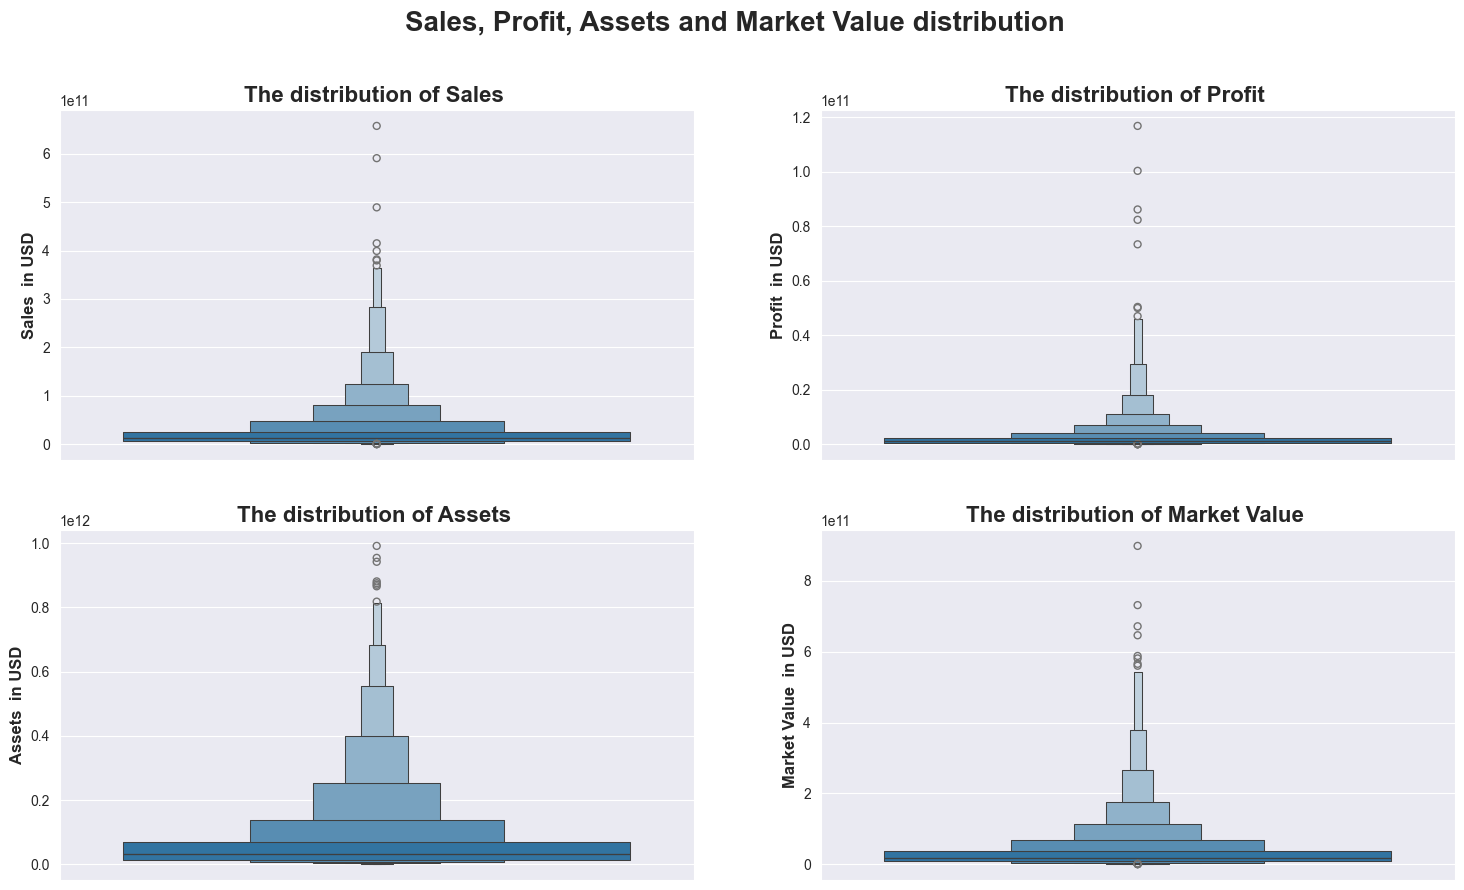

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
boxen_plot(companies["Sales"],axes[0,0])
boxen_plot(companies["Profit"],axes[0,1])
boxen_plot(companies["Assets"],axes[1,0])
boxen_plot(companies["Market Value"],axes[1,1])
fig.suptitle("Sales, Profit, Assets and Market Value distribution",
             fontsize=20,
             fontweight='bold')

plt.show()

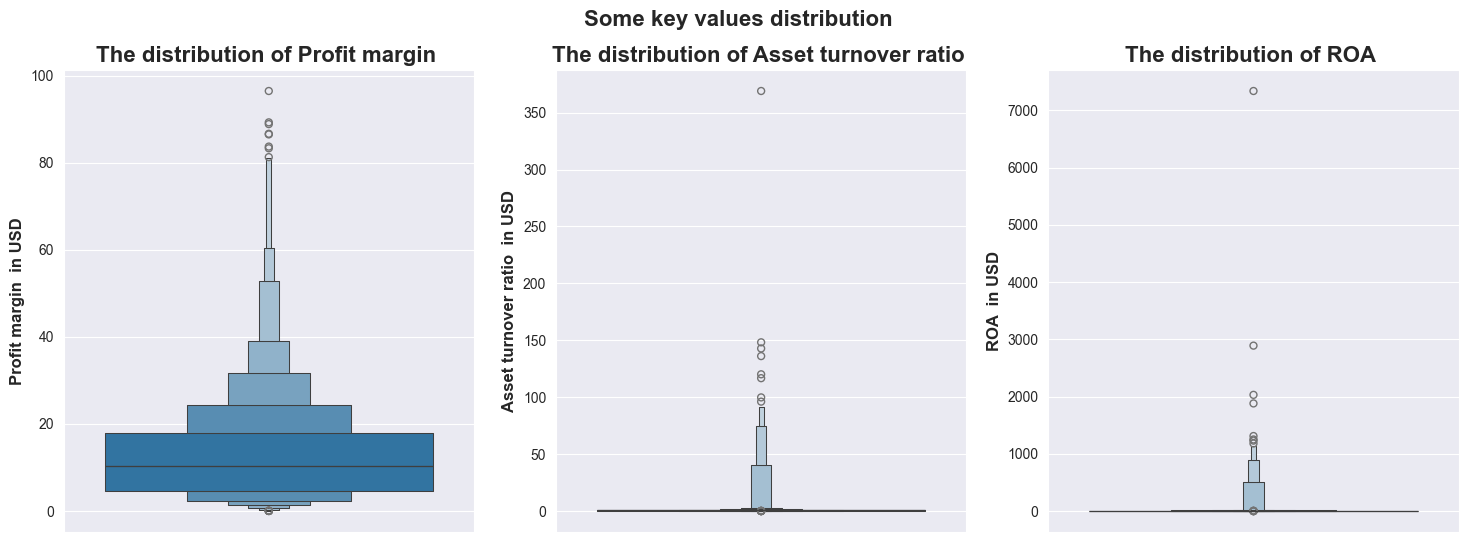

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
boxen_plot(companies["Profit_margin"],axes[0])
boxen_plot(companies["Asset_turnover_ratio"],axes[1])
boxen_plot(companies["ROA"],axes[2])
fig.suptitle("Some key values distribution",
             fontsize=16,
             fontweight='bold')

plt.show()


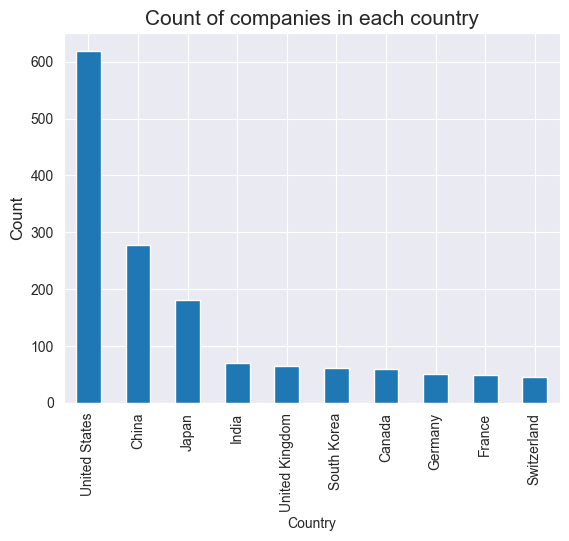

In [10]:
companies['Country'].value_counts().head(10).plot(kind='bar')
plt.title("Count of companies in each country", fontsize=15)
plt.ylabel("Count", fontsize=12)
plt.show()

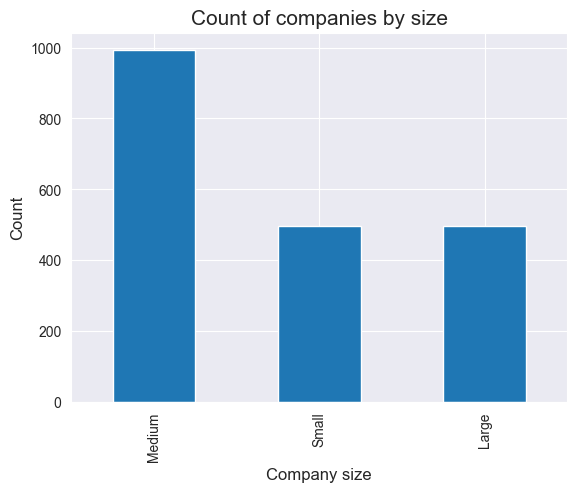

In [11]:
companies['company_size'].value_counts().plot(kind='bar')
plt.title("Count of companies by size", fontsize=15)
plt.xlabel("Company size", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

#### Bivariate Analysis

In [37]:
def scatter_plot(x, y, ax):
    xlapel = split(x)
    ylabel = split(y)
    sns.scatterplot(x=x,y=y, ax=ax)
    # ax.set_title(str(xlapel)+" VS "+str(ylabel),
    #     fontsize=12,
    #     fontweight='bold')

    ax.set_ylabel(
        str(ylabel),
        fontsize=13,
        fontweight='bold'
    )
    ax.set_xlabel(
        str(xlapel),
        fontsize=13,
        fontweight='bold'
    )
    

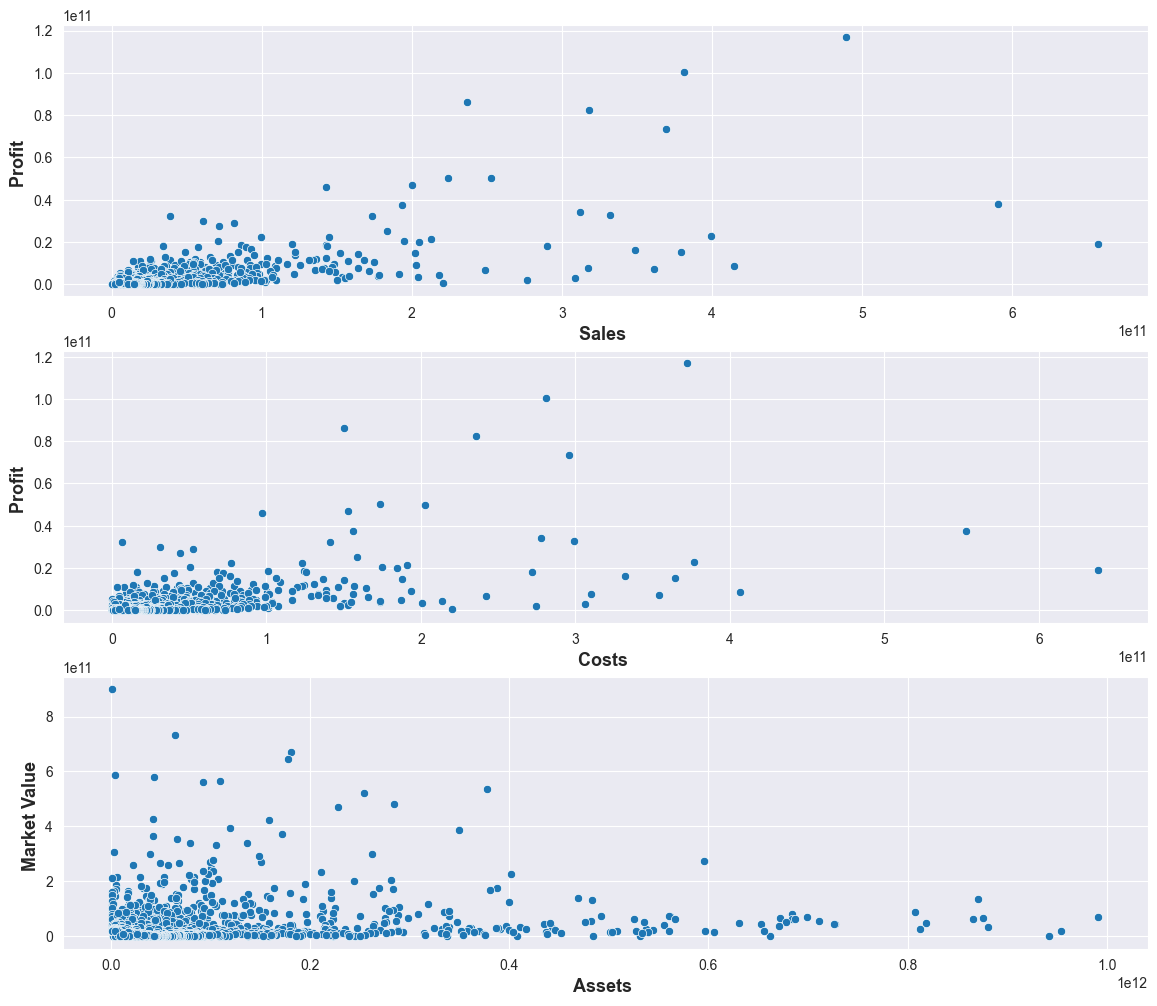

In [39]:
fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(14,12))
scatter_plot(companies["Sales"],companies["Profit"], axes[0])
scatter_plot(companies["Costs"],companies["Profit"], axes[1])
scatter_plot(companies["Assets"],companies["Market Value"], axes[2])
# fig.suptitle("Bivariate Analysis",
#              fontsize=16,
#              fontweight='bold')

plt.show()

#### Multivariate Analysis

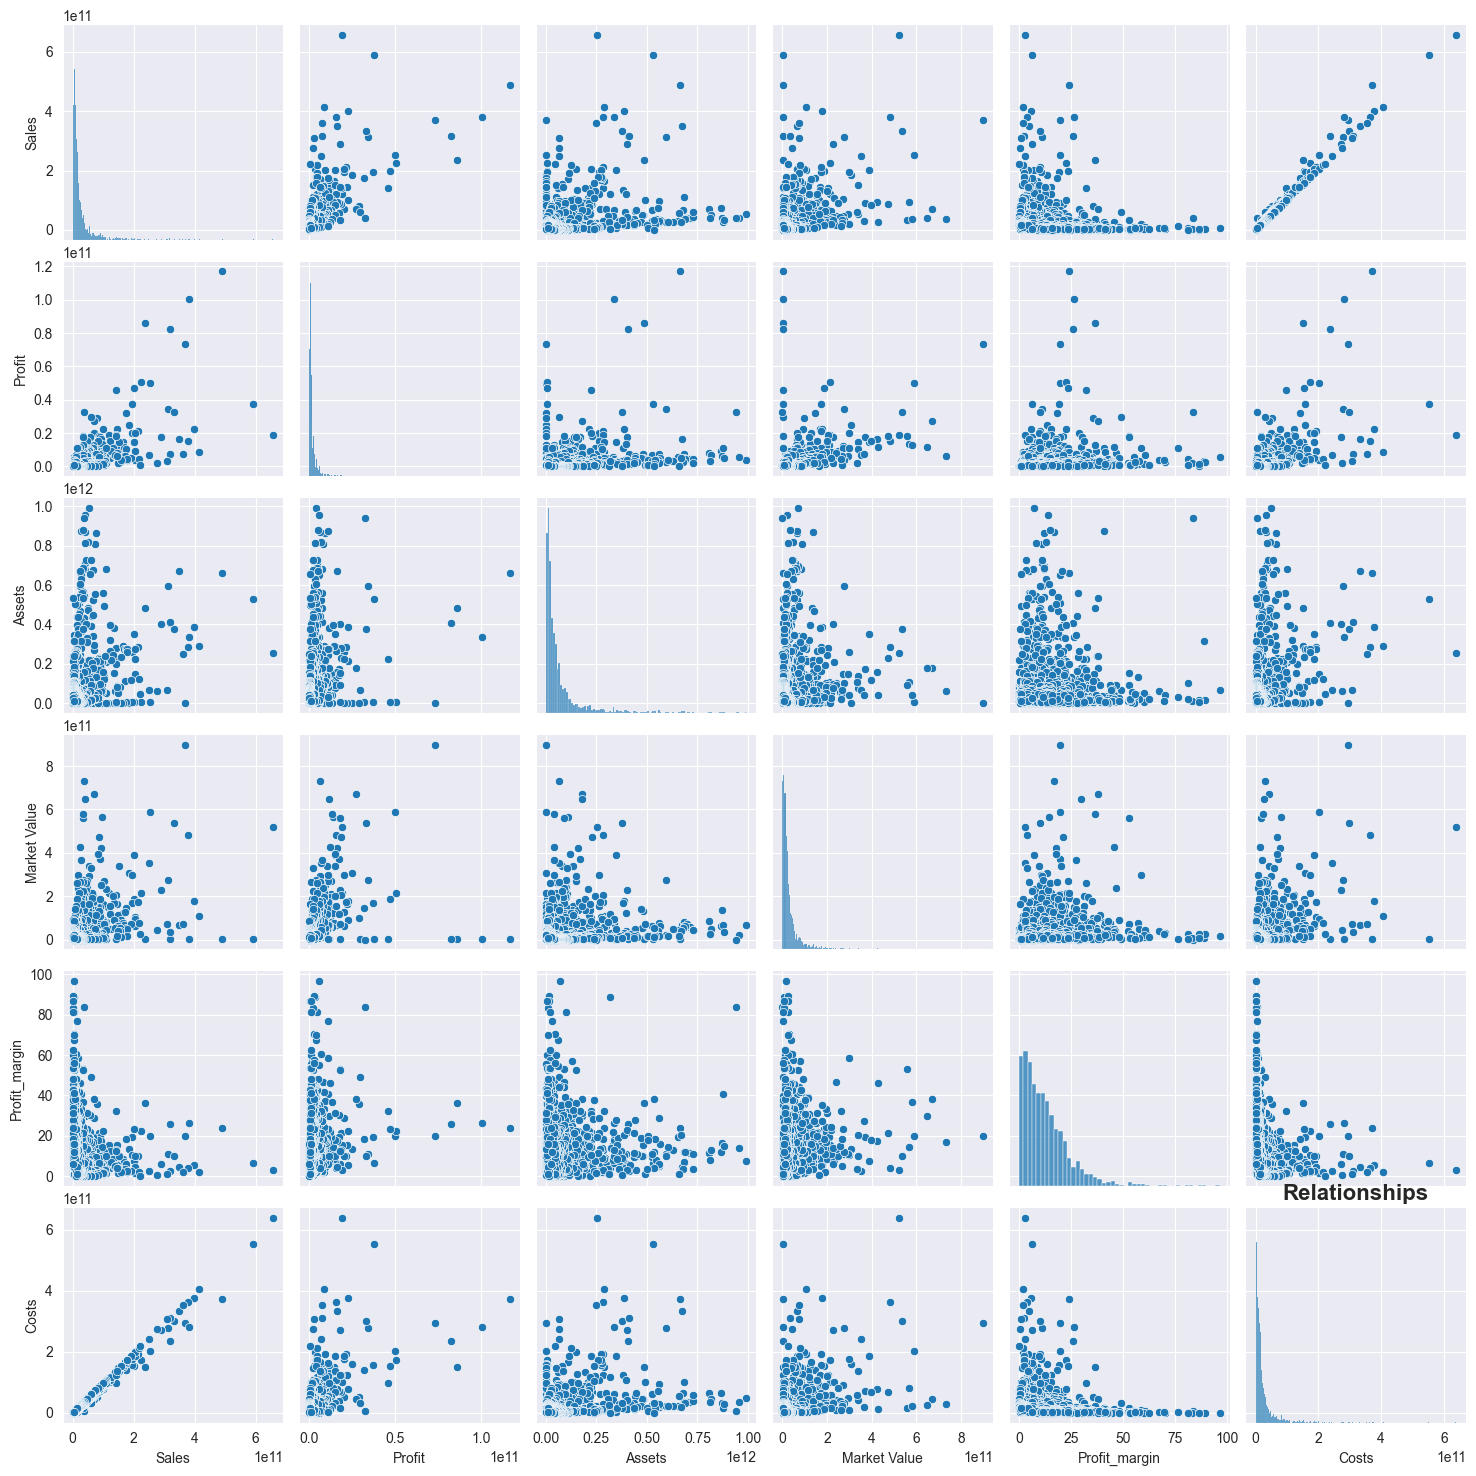

In [42]:
sns.pairplot(companies[['Sales', 'Profit', 'Assets', 'Market Value', 'Profit_margin','Costs']])

plt.show()

C:\Users\nmn\AppData\Local\Temp\ipykernel_29520\414344444.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  companies_size = companies.groupby("company_size").agg({"Profit_margin":np.median, "ROA":np.median,"Asset_turnover_ratio":np.median}).plot(kind="bar")
C:\Users\nmn\AppData\Local\Temp\ipykernel_29520\414344444.py:1: FutureWarning: The provided callable <function median at 0x000001BE70931760> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  companies_size = companies.groupby("company_size").agg({"Profit_margin":np.median, "ROA":np.median,"Asset_turnover_ratio":np.median}).plot(kind="bar")


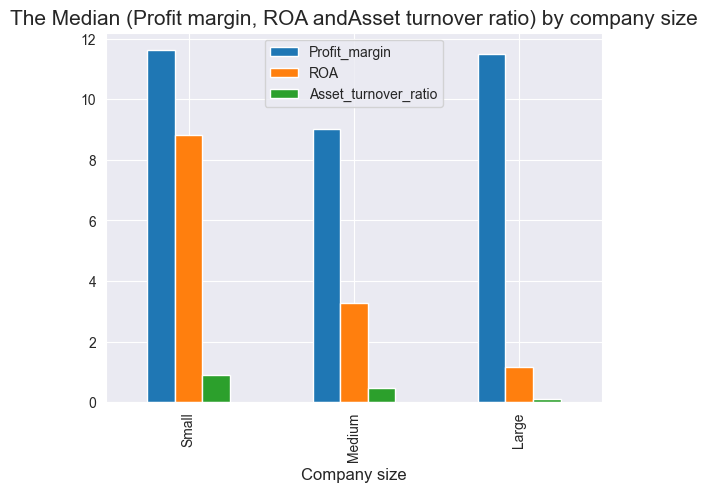

In [47]:
companies_size = companies.groupby("company_size").agg({"Profit_margin":np.median, "ROA":np.median,"Asset_turnover_ratio":np.median}).plot(kind="bar")
plt.title("The Median (Profit margin, ROA and Asset turnover ratio) by company size", fontsize=15)
plt.xlabel("Company size", fontsize=12)
plt.show()
#print(companies_size)


In [49]:
top_10_companies_by_profitmargin = companies[["Name","Country","Profit_margin"]].sort_values(by="Profit_margin",ascending=False).head(n=10)
display(top_10_companies_by_profitmargin)

,Name,Country,Profit_margin
722,Porsche Automobil Holding,Germany,96.491228
1082,EXOR,Netherlands,89.285714
876,Jackson Financial,United States,88.888889
1925,Schibsted ASA,Norway,86.666667
1603,Jio Financial Services,India,86.517857
413,Schweizerische Nationalbank,Switzerland,83.720930
1695,Eurazeo,France,83.333333
1859,Enstar Group,Bermuda,81.300000
1076,Vonovia,Germany,81.132075
1403,Lumen Technologies,United States,76.595745


In [50]:
worst_10_companies_by_profitmargin = companies[["Name","Country","Profit_margin"]].sort_values(by="Profit_margin").head(n=10)
display(worst_10_companies_by_profitmargin)

,Name,Country,Profit_margin
1608,New Hope Liuhe,China,0.000546
859,Woolworths,Australia,0.012156
1865,Viva Energy Group,Australia,0.014045
1311,Shanghai Electric Group,China,0.037342
972,Vestas Wind Systems,Denmark,0.038788
1867,Zall Smart Commerce Group,China,0.040909
549,BASF,Germany,0.046602
1526,PTT Global Chemical,Thailand,0.049162
1701,China Grand Automotive Services,China,0.049733
967,St. James's Place,United Kingdom,0.053390


In [51]:
top_10_companies_by_ROA = companies[["Name","Country","ROA"]].sort_values(by="ROA",ascending=False).head(n=10)
display(top_10_companies_by_ROA)

,Name,Country,ROA
1,Berkshire Hathaway,United States,7340.0
34,UBS,Switzerland,2890.0
33,China Merchants Bank,China,2030.0
15,Wells Fargo,United States,1880.0
55,Bank of Communications,China,1310.0
0,JPMorganChase,United States,1250.0
35,Santander,Spain,1230.0
28,Ping An Insurance Group,China,1180.0
26,RBC,Canada,1130.0
82,Industrial Bank,China,1060.0
